In [16]:
import pandas as pd


df = pd.read_csv("/content/practice_data.csv")

df.head()

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [17]:
#selecting features

x = df.drop(['department','Days Present' ], axis=1)
y = df['department']

print(x,y)


    EmployeeID  gender Accuracy_of_Work Meeting Project Deadlines  \
0            1    Male             High                       Yes   
1            2  Female           Medium                       Yes   
2            3    Male             High                        No   
3            4    Male              Low                       Yes   
4            5  Female           Medium                       Yes   
5            6    Male             High                       Yes   
6            7  Female              Low                        No   
7            8    Male           Medium                       Yes   
8            9    Male             High                       Yes   
9           10  Female           Medium                       Yes   
10          11    Male             High                        No   
11          12  Female              Low                       Yes   
12          13    Male           Medium                       Yes   
13          14    Male            

In [18]:
#standard scaling
from sklearn.preprocessing import StandardScaler

data = df['Task Completion Rates'].values.reshape(-1,1)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

print(scaled)


[[ 0.8549646 ]
 [ 1.40712924]
 [ 0.30279996]
 [-0.24936467]
 [ 0.8549646 ]
 [ 1.95929387]
 [-0.80152931]
 [ 0.30279996]
 [ 1.40712924]
 [ 0.8549646 ]
 [-0.24936467]
 [-0.80152931]
 [ 0.30279996]
 [ 1.40712924]
 [-1.35369395]
 [-0.24936467]
 [ 0.8549646 ]
 [ 0.30279996]
 [-0.80152931]
 [-1.35369395]
 [-0.24936467]
 [ 0.8549646 ]
 [-1.90585859]
 [-0.80152931]
 [ 0.30279996]
 [-1.35369395]
 [-0.24936467]
 [ 0.8549646 ]
 [-1.90585859]
 [-0.80152931]
 [ 0.30279996]]


In [19]:
from sklearn.preprocessing import MinMaxScaler

data = df['Task Completion Rates'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

print(scaled)


[[0.71428571]
 [0.85714286]
 [0.57142857]
 [0.42857143]
 [0.71428571]
 [1.        ]
 [0.28571429]
 [0.57142857]
 [0.85714286]
 [0.71428571]
 [0.42857143]
 [0.28571429]
 [0.57142857]
 [0.85714286]
 [0.14285714]
 [0.42857143]
 [0.71428571]
 [0.57142857]
 [0.28571429]
 [0.14285714]
 [0.42857143]
 [0.71428571]
 [0.        ]
 [0.28571429]
 [0.57142857]
 [0.14285714]
 [0.42857143]
 [0.71428571]
 [0.        ]
 [0.28571429]
 [0.57142857]]


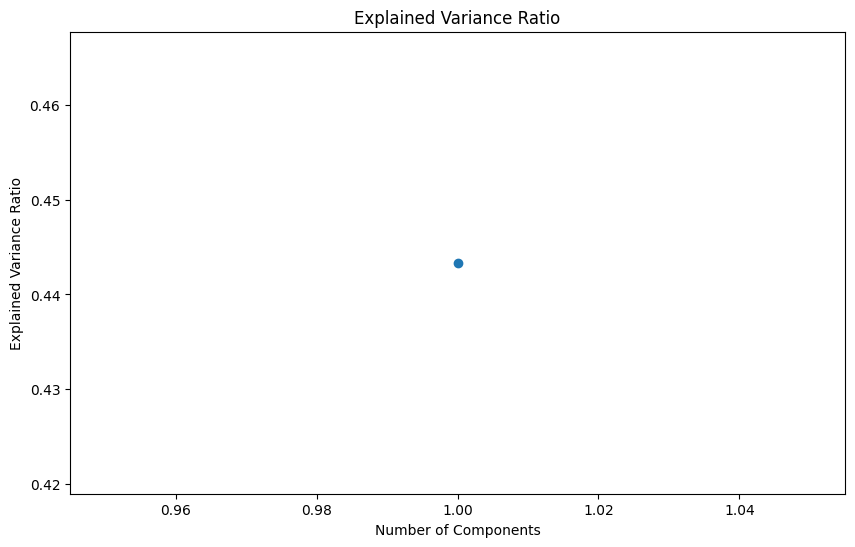

In [30]:
#PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# x=df['Task Completion Rates']
x = df.select_dtypes(include=['float64', 'int64'])
x_scaled = StandardScaler().fit_transform(x)

y = df.select_dtypes(include=['float64', 'int64'])
y_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)

x_pca =pca.fit_transform(x_scaled)
y_pca =pca.fit_transform(y_scaled)

# temp_pca = pca.fit_transform(x_scaled)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(evr) + 1), evr, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()





In [35]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)


#  sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
